In [51]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib, math
import numpy as np
import datetime as dt
from pandas import Series, DataFrame

# **extracting data **
## **the teacher's original code using numpy:**
>* standard way to use converters to parse time string: converters={0:strpdate2num(fmt)}

Stock to plot: tsla
('Currently pulling:', 'tsla')


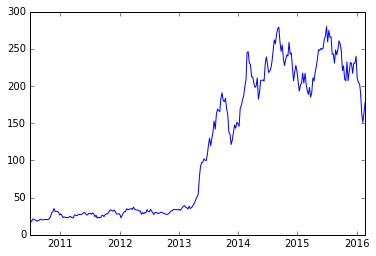

In [35]:
def bytespdate2num(fmt,encoding='utf-8'):
    # instantiate the strpdate2num class
    # __init__(self,fmt)
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        # __call__(self,s)
        return str_converter(s)
    return bytes_converter 
    
def graph_data(stock):
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = urllib.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
                
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})
    plt.plot_date(date,closep,'-')
    plt.show()
    
stock = raw_input('Stock to plot: ')
df = graph_data(stock)

## things I leant -- create an object which is a function:
>* using \__call\__

In [158]:
class onebyone():
    def __init__(self):
        self.i = 0
    
    def __call__(self):
        
        print self.i
        if self.i<100:
            self.i += 1
        else:
            self.i = 0

plotone = onebyone()

In [166]:
plotone()

7


## converting from unix time

Stock to plot: tsla
('Currently pulling:', 'tsla')


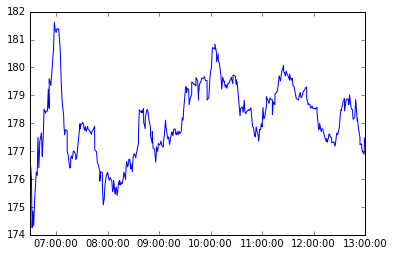

In [53]:
def graph_data(stock):
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1d/csv'
    source_code = urllib.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
                
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,delimiter=',',
                                                          unpack=True)
    # date_conv represents a function
    date_conv = np.vectorize(dt.datetime.fromtimestamp)
    date = date_conv(date)
    plt.plot_date(date,closep,'-')
    plt.show()
    
stock = raw_input('Stock to plot: ')
df = graph_data(stock)

## **my code using pandas:**

In [120]:
def graph_data(stock):
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=3m/csv'
    source_code = urllib.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(split_line)
                
    df = DataFrame(stock_data, columns=['date','closp','highp','lowp','openp','volume'])
    def convdate(date):
        # can also return the datetime format and plot as it is, which is more straight-forward
        time = datetime.datetime.strptime(date, '%Y%m%d')
        return int(mdates.date2num(time))
    df['numdate'] = df.date.apply(convdate)
    return df

In [193]:
stock = raw_input('Stock to plot: ')
df = graph_data(stock)

Stock to plot: xom
('Currently pulling:', 'xom')


# ** the plotting code **

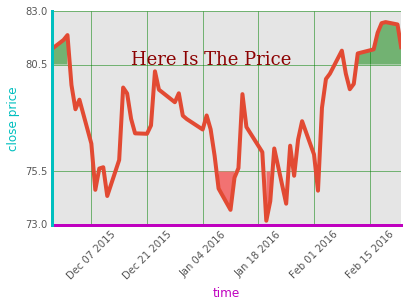

In [180]:
date = np.array(df.numdate.tolist())
closep = np.array(df.closp.astype(float).tolist())
# create figure handler
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0)) # grid and starting location
plt.xlabel('time')
plt.ylabel('close price')
# plot date
ax1.plot_date(date,closep,'-')

# tilt the ticks
for tick in ax1.xaxis.get_ticklabels():
    tick.set_rotation(45)
    
# set ticks
datamax = math.ceil(closep.max())
datamin = math.floor(closep.min())
ax1.set_yticks([datamin, datamin + (datamax-datamin)/4, datamin + (datamax-datamin)*3/4, datamax])

# axis lim
ax1.set_ylim([datamin, datamax])

# fill (instead of plot_date)
# if the input are list's, the fill_between wouldnt work
upperline = datamin + (datamax-datamin)*3/4
lowerline = datamin + (datamax-datamin)/4
ax1.fill_between(date, closep, upperline, where=(closep>=upperline), facecolor='g', alpha=0.5)
ax1.fill_between(date, closep, lowerline, where=(closep<lowerline), facecolor='r', alpha=0.5)
# add horizontal lines
ax1.axhline(datamax*3/4, color='g')
ax1.axhline(datamax/4, color='r')

# grid
ax1.grid(True, color='g',linestyle='-', linewidth=0.5)

# x,y axis label
ax1.xaxis.label.set_color('m')
ax1.yaxis.label.set_color('c')

# spines
ax1.spines['left'].set_color('c')
ax1.spines['bottom'].set_color('m')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)

# plot location
plt.subplots_adjust(left=.09, bottom=.16,right=.9,top=.9,wspace=.2,hspace=.2)

# adding text
font = {'family' : 'serif',
       'color' : 'darkred',
       'size' : 18}
plt.text(date[len(date)/4],datamin+(datamax-datamin)*3/4,'Here Is The Price', fontdict=font)

plt.show()

In [171]:
len(date)/2

29

## ** Candlestick plot **

In [148]:
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

# using styles
from matplotlib import style

In [133]:
openp = np.array(df.openp.astype(float).tolist())
highp = np.array(df.highp.astype(float).tolist())
lowp = np.array(df.lowp.astype(float).tolist())
volume = np.array(df.volume.astype(float).tolist())

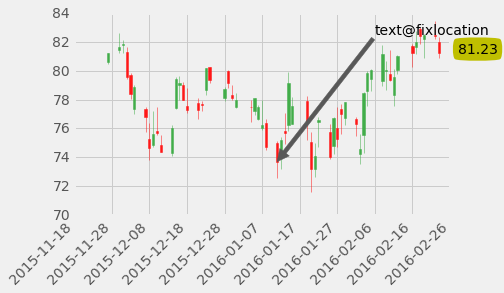

In [192]:
# reformat data into a list of tuples (d,o,h,l,c,v)
x=0
y=len(date)
new_list = []
while x<y:
    append_line = date[x], openp[x], highp[x], lowp[x],closep[x], volume[x] # tuple
    new_list.append(append_line)
    x += 1

# use existing style
style.use('fivethirtyeight')

# plot
fig, ax = plt.subplots() # grid and starting location
candlestick_ohlc(ax,new_list,width=0.6,colorup='#41ad49',colordown='#ff1717')

# correct the date format
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# annotation
# @ fixed location
ax.annotate('text@fixlocation', (date[len(date)/2], closep[len(closep)/2]),
             xytext=(0.8,0.9), textcoords='axes fraction',
             arrowprops=dict(facecolor='#585858', color='#585858'))
# @ dynamic location
ax.annotate(str(closep[-1]), (date[-1], closep[-1]),
             xytext=(date[-1]+5, closep[-1]), 
             bbox=dict(boxstyle='round4,pad=0.3',fc='y', ec='y', lw=2))

fig.autofmt_xdate(rotation=45)

plt.show()

#### view available styles and edit

In [154]:
print(plt.style.available)
print(plt.__file__)
# /matplotlib/style

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']
/home/zliu/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc


#### animation